In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [9]:
df=pd.read_csv('/content/retail_sales_dataset.csv')
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [19]:
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [22]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [18]:
missing_values= df.isnull().sum()
duplicted_values=df.duplicated().sum()
print(missing_values)
print(f'dataset has {duplicted_values} duplicates')

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
dataset has 0 duplicates


In [26]:
print("Number of unique values :")
print(f": {df.nunique()} unique values")

Number of unique values :
: Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64 unique values


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

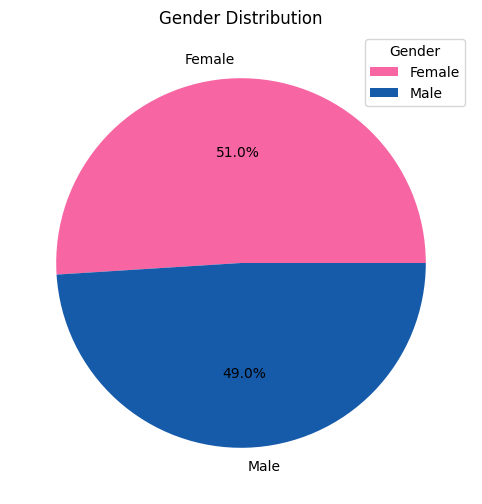

In [28]:
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(10,6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#F765A3', '#165BAA'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.legend(labels=gender_distribution.index, title='Gender', loc='best')
plt.show()

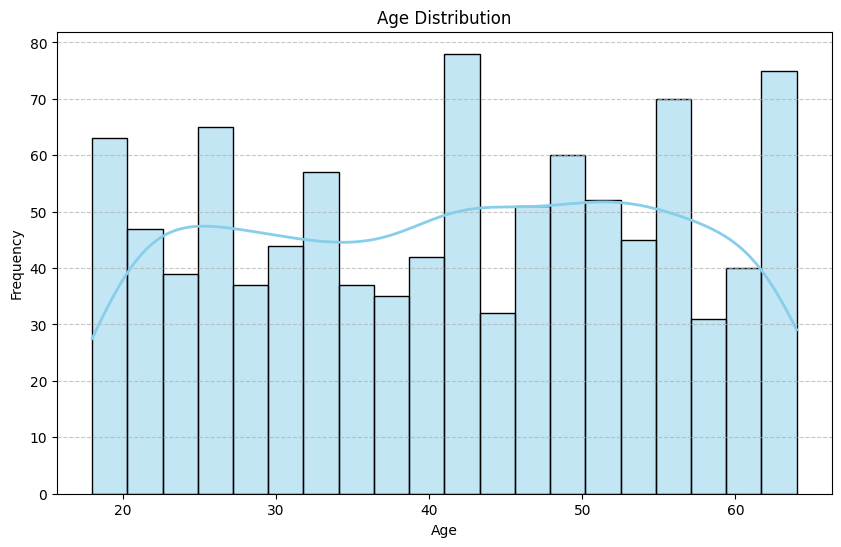

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color = 'skyblue', line_kws={'linewidth': 2})
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
df['yearmonth'] = df['Date'].dt.strftime('%B')  # %B gives the full month name

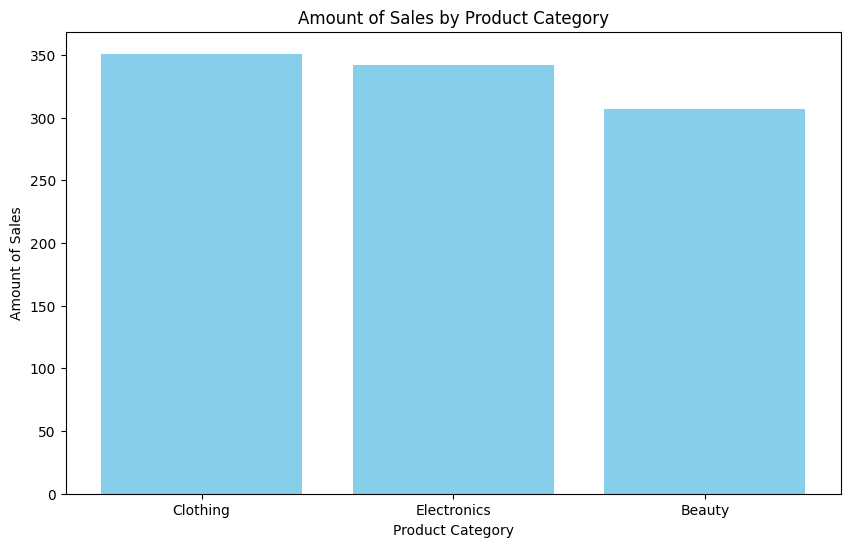

In [57]:
popular_categories = df['Product Category'].value_counts()
popular_categories = popular_categories.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(popular_categories.index, popular_categories.values, color='skyblue')
plt.title('Amount of Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount of Sales')
plt.show()

<ipython-input-56-930cb59f4d6d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('yearmonth')['Total Amount'].sum().reset_index()


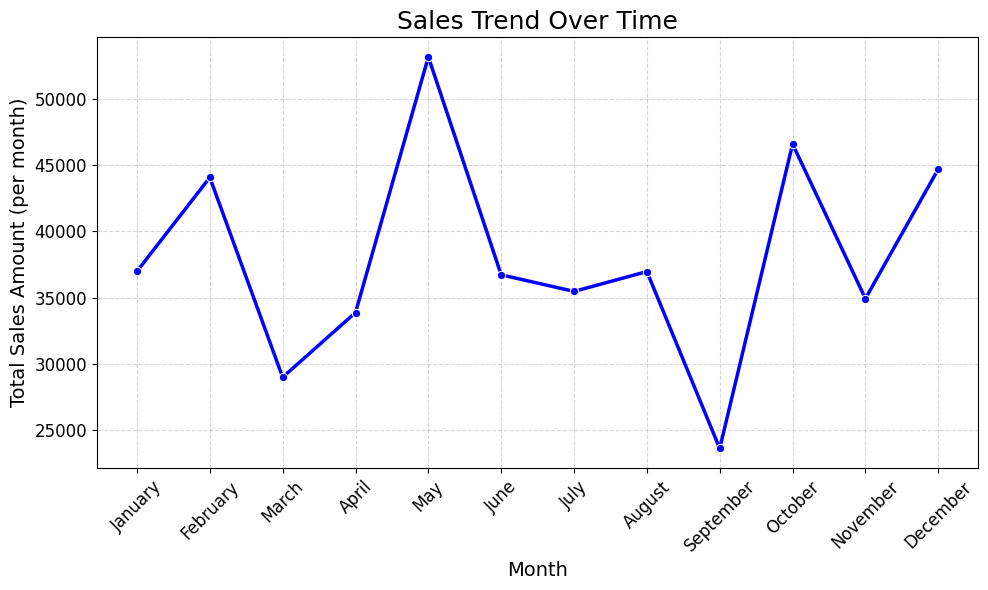

In [56]:
df['yearmonth'] = pd.Categorical(
    df['yearmonth'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Aggregate total sales by month
monthly_sales = df.groupby('yearmonth')['Total Amount'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='yearmonth', y='Total Amount', data=monthly_sales, marker='o', linewidth=2.5, color='blue')
plt.title('Sales Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount (per month)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


<ipython-input-85-8679bf9afd12>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_count = df.groupby('yearmonth')['Transaction ID'].count()


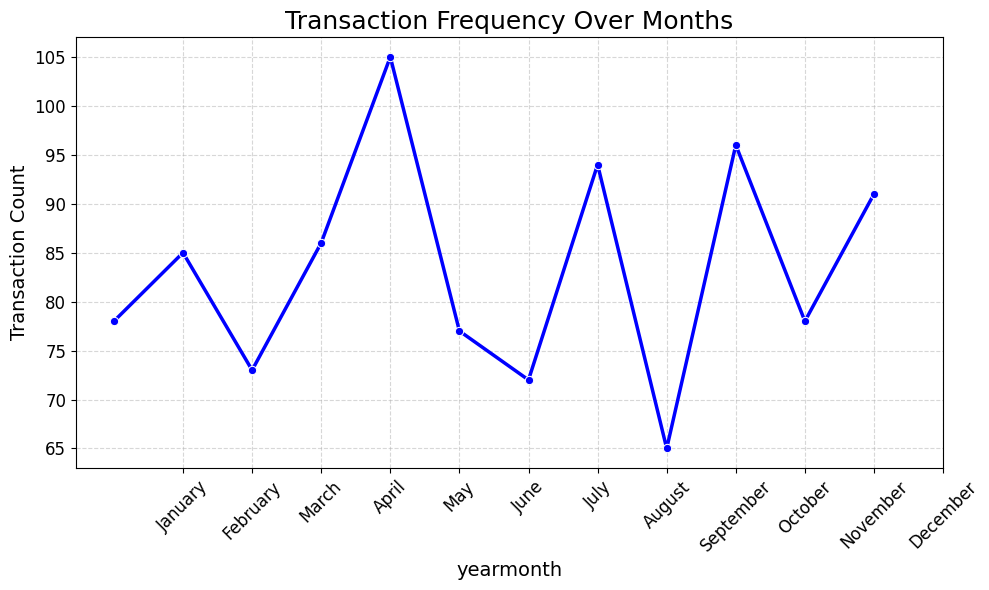

In [85]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['yearmonth'] = df['Date'].dt.strftime('%B')
df['yearmonth'] = pd.Categorical(
    df['yearmonth'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Group by Month and count the number of transactions
transaction_count = df.groupby('yearmonth')['Transaction ID'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_count.index, y=transaction_count.values, marker='o', linewidth=2.5, color='blue')
plt.title('Transaction Frequency Over Months', fontsize=18)
plt.xlabel('yearmonth', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

<ipython-input-84-121919f5bbdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


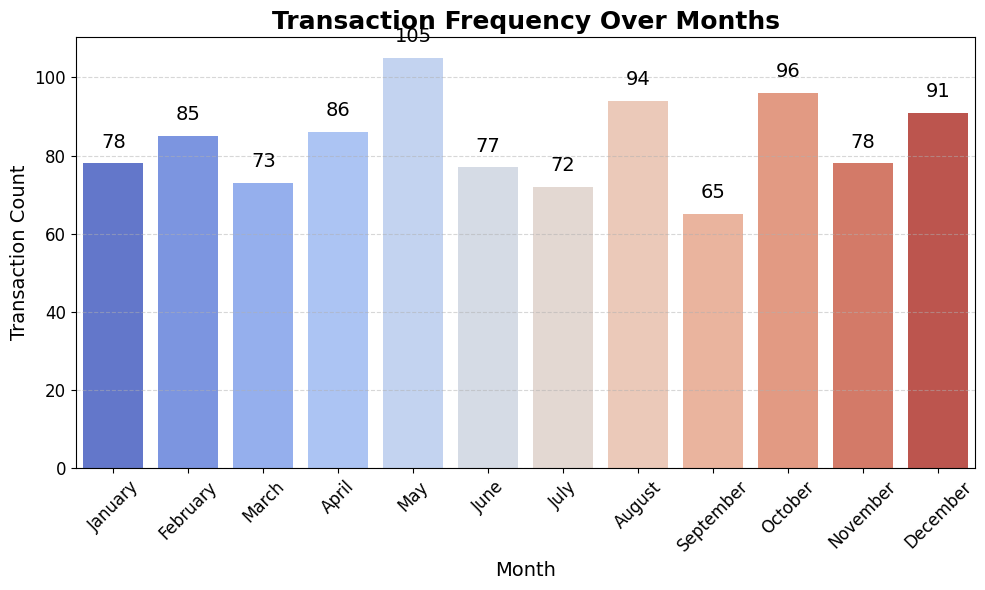

In [84]:
# Plot the transaction frequency as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=transaction_count.index,
    y=transaction_count.values,
    palette='coolwarm'
)

plt.title('Transaction Frequency Over Months', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)

plt.xticks(
    ticks=range(12),
    labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    rotation=45, fontsize=12
)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', alpha=0.5, linestyle='--')

# Add values on top of bars for better insights
for index, value in enumerate(transaction_count.values):
    plt.text(index, value + 4, str(value), ha='center', fontsize=14, color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Months by Names in the Dataset:
['November' 'February' 'January' 'May' 'April' 'March' 'December'
 'October' 'August' 'September' 'June' 'July']


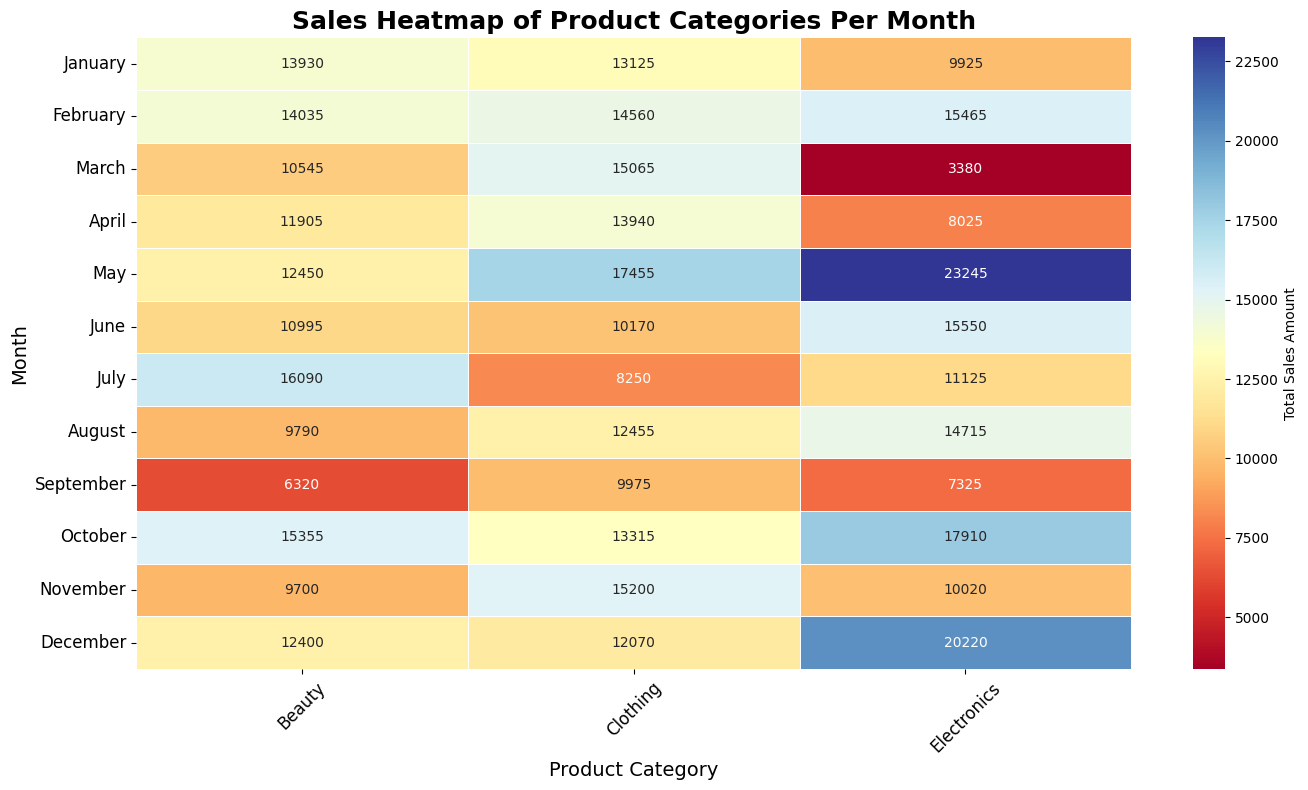

In [74]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()

print("Months by Names in the Dataset:")
print(df['Month'].unique())

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(
    index='Month',
    columns='Product Category',
    values='Total Amount',
    aggfunc='sum'
)

# Ensure the months are ordered correctly in the heatmap
heatmap_data = heatmap_data.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='RdYlBu',
    linewidths=0.5,
    cbar_kws={'label': 'Total Sales Amount'}
)
plt.title('Sales Heatmap of Product Categories Per Month', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [86]:
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['Child (0-18)', 'Youth (19-25)', 'Adult (26-35)', 'Middle-Aged (36-50)', 'Senior (50+)']

# Create a new column 'Age Group' with the age bins
df['Age Group'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
)

# Verify the creation of the 'Age Group' column
print("Age Group Binning Completed:")
print(df[['Age', 'Age Group']].head())
df.head()

Age Group Binning Completed:
   Age            Age Group
0   34        Adult (26-35)
1   26        Adult (26-35)
2   50  Middle-Aged (36-50)
3   37  Middle-Aged (36-50)
4   30        Adult (26-35)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,yearmonth,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,Adult (26-35)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,Adult (26-35)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,Middle-Aged (36-50)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,Middle-Aged (36-50)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,Adult (26-35)


<ipython-input-87-f0531ad5e775>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_data = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()


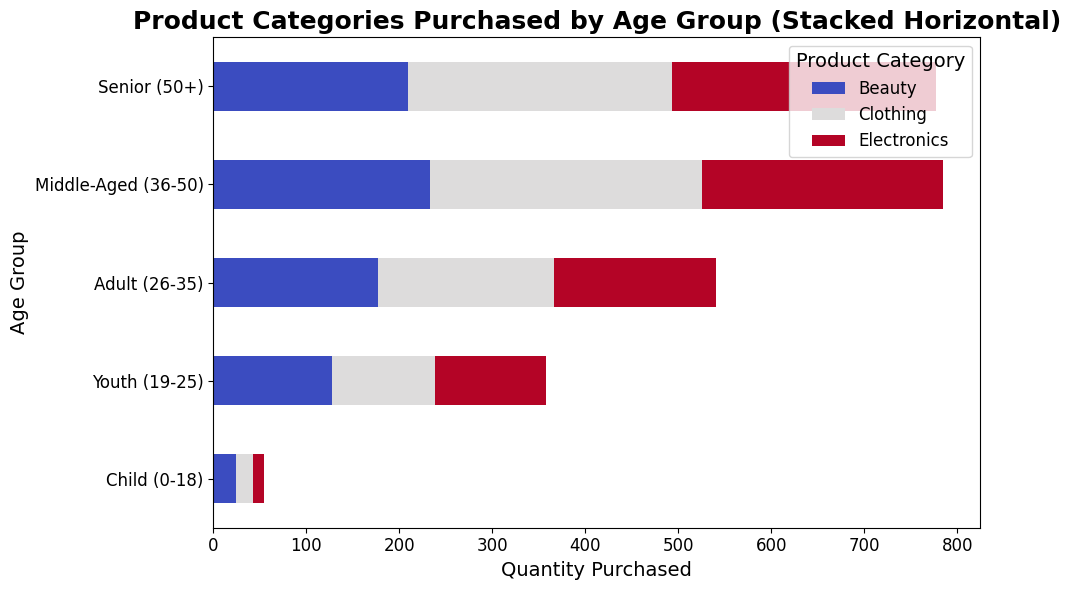

In [87]:
# Aggregate data by Age Group and Product Category
stacked_data = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()

stacked_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm'  # Use a visually distinct colormap
)

plt.title('Product Categories Purchased by Age Group (Stacked Horizontal)', fontsize=18, fontweight='bold')
plt.xlabel('Quantity Purchased', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Product Category', title_fontsize=14, fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


<ipython-input-89-69622e685565>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = df.groupby('yearmonth')['Total Amount'].sum().reset_index()
<ipython-input-89-69622e685565>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


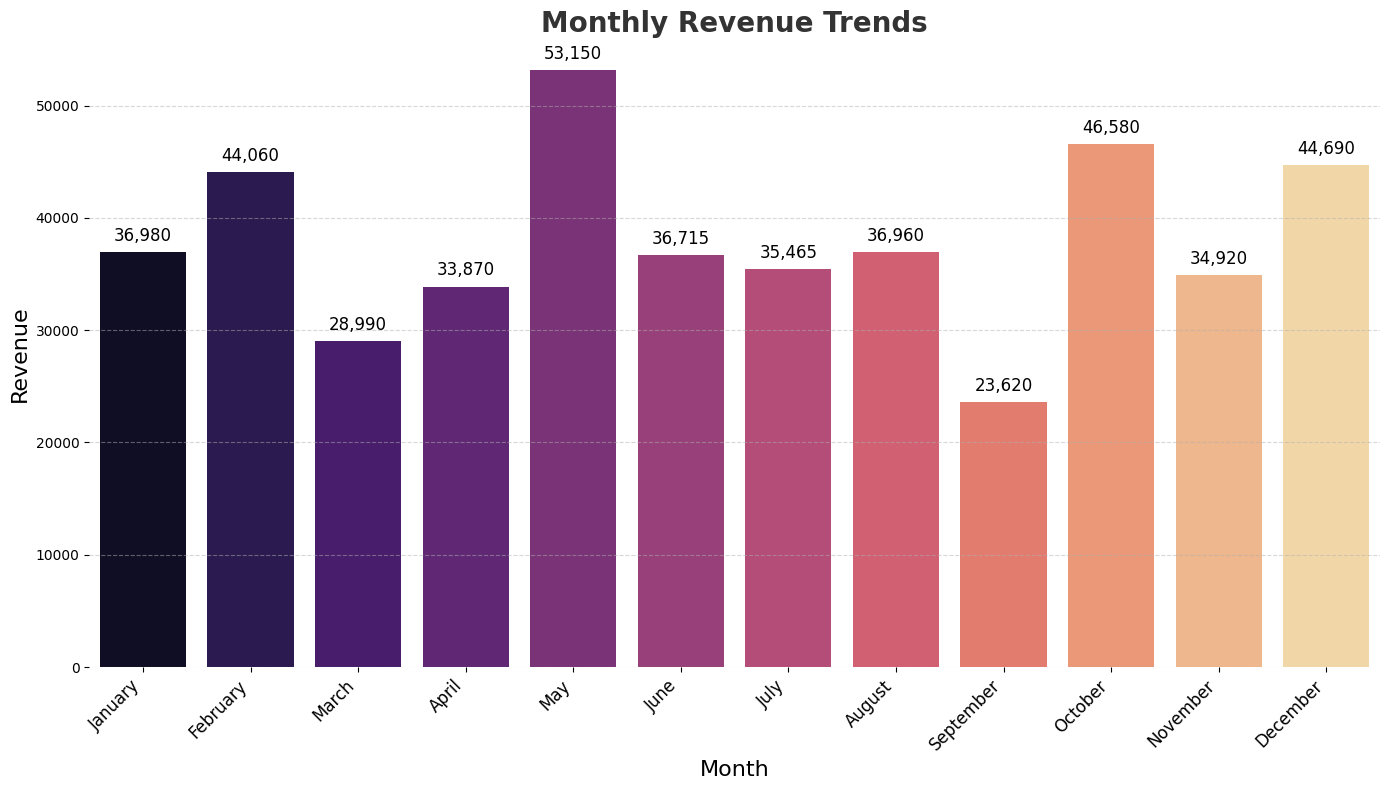

In [89]:
# Calculate monthly revenue totals
monthly_totals = df.groupby('yearmonth')['Total Amount'].sum().reset_index()

# Ensure the months are ordered correctly
monthly_totals['yearmonth'] = pd.Categorical(
    monthly_totals['yearmonth'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Create the bar plot
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x='yearmonth',
    y='Total Amount',
    data=monthly_totals,
    palette='magma'
)

# Add labels and title
plt.title('Monthly Revenue Trends', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Revenue', fontsize=16)

# Annotate bar values
for bar, total in zip(bars.patches, monthly_totals['Total Amount']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{total:,.0f}",
        ha='center',
        fontsize=12,
        color='black'
    )

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

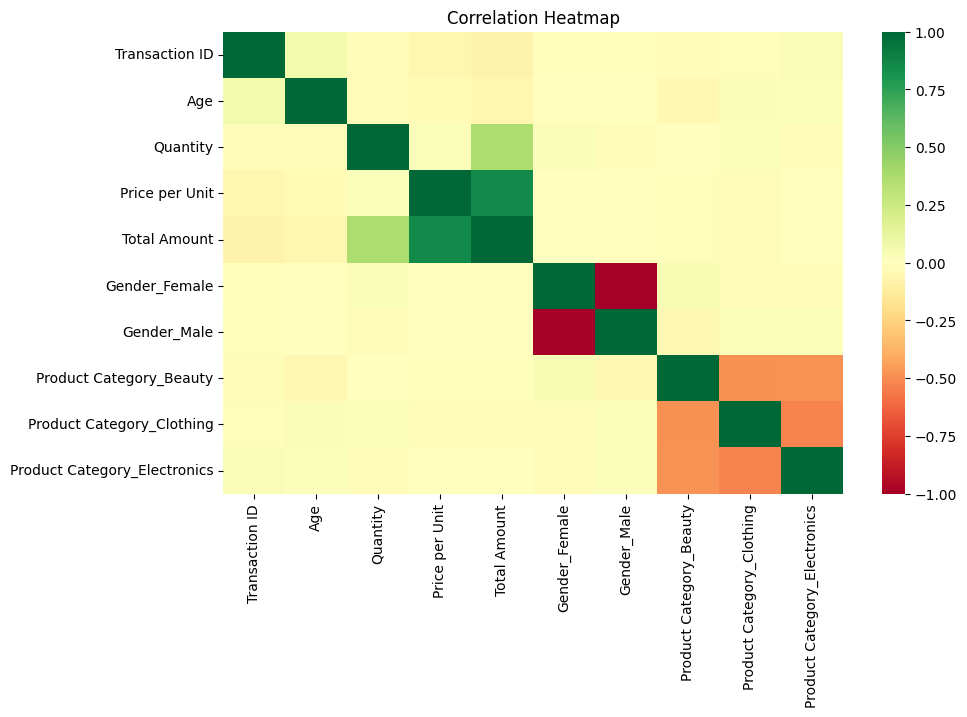

In [82]:
df_dummies = pd.get_dummies(data=df, columns=['Gender', 'Product Category'])

#The correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_dummies.corr(numeric_only=True), cmap='RdYlGn', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# **Linear Regression Model**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
# ---  Define Dependent and Independent Variables ---
y = df_dummies['Total Amount']
X = df_dummies[['Age', 'Quantity', 'Price per Unit',
                'Gender_Female', 'Gender_Male',
                'Product Category_Beauty',
                'Product Category_Clothing',
                'Product Category_Electronics']]

In [92]:
# --- Split Data into Training and Testing Sets (80% - 20%) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---  Initialize and Fit the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# ---  Make Predictions ---
y_pred = model.predict(X_test)

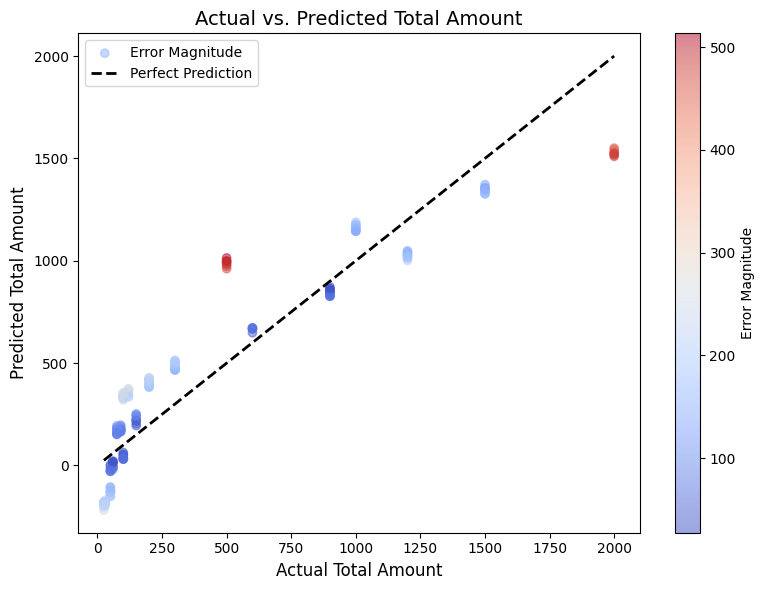

In [93]:
# ---  Plot Actual vs. Predicted Values ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=abs(y_test - y_pred), cmap='coolwarm', alpha=0.5, label='Error Magnitude')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Total Amount', fontsize=14)
plt.xlabel('Actual Total Amount', fontsize=12)
plt.ylabel('Predicted Total Amount', fontsize=12)
plt.legend()
plt.colorbar(label='Error Magnitude')
plt.tight_layout()
plt.show()

In [96]:
# ---  Evaluate Model Performance ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 41883.99204291323
Root Mean Squared Error: 204.6557891751739
R-squared: 0.8569189755192648
